# Load packages

In [1]:
from scipy.cluster.hierarchy import linkage, leaves_list, dendrogram
from scipy.spatial.distance import pdist, squareform
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from bioinfokit import analys, visuz
from statsmodels.stats.multitest import multipletests

sns.set(style='white')

# Get data

We also cut out the first two columns to only leave the FPKM values.

In [2]:
df = pd.read_csv('all_annotated.csv')
df = df[df.median(1, numeric_only=True) > 0]
df = df.apply(lambda x: np.log2(x + 0.1) if x.name in df.columns[2:] else x)
df

,t_name,gene_name,male_10,male_11,male_12,male_13,male_14A,male_14B,male_14C,male_14D,female_10,female_11,female_12,female_13,female_14A,female_14B,female_14C,female_14D
3,FBtr0302347,CR40182,4.573651,3.593093,4.383186,3.772605,4.240476,4.749679,4.518529,3.558602,4.459054,3.809626,4.051558,3.669331,4.995485,4.522507,3.851021,4.112914
8,FBtr0113885,Parp,3.472120,-3.321928,-3.321928,-3.321928,3.897757,-3.321928,4.145813,3.436875,-3.321928,-3.321928,3.905799,3.869772,4.353582,2.066050,-3.321928,4.665883
9,FBtr0301810,Alg-2,4.260622,-3.321928,3.900371,4.801878,4.484797,2.990301,3.801070,3.701063,4.222705,1.594158,4.209672,4.729653,4.784754,2.913181,2.897078,4.516802
10,FBtr0113895,Tim17b,2.681610,2.012708,2.665469,6.130167,6.072718,2.945977,6.230339,5.750615,5.486961,4.081859,5.728691,6.286330,6.338167,4.998373,5.621212,6.280001
11,FBtr0345179,Tim17b,6.899972,3.552258,6.909741,6.245611,6.188155,6.953605,6.345793,5.901059,5.602316,4.196805,5.844084,6.439396,6.453632,5.113628,5.736589,6.410012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34663,FBtr0100884,mt:Cyt-b,5.063561,0.209330,3.312209,8.696872,6.681296,4.675181,6.166922,6.945737,6.905339,-0.371506,5.597221,6.170259,7.891809,5.452891,6.239269,7.386673
34665,FBtr0100886,mt:ND1,4.661599,-0.437467,4.418274,9.014515,8.350559,5.778312,8.493319,7.797501,8.259794,1.172241,7.649749,8.615611,8.760742,4.441070,6.523595,9.412730
34667,FBtr0100888,mt:lrRNA,11.191931,5.095088,9.857502,12.271701,11.136488,9.213941,11.283776,10.690080,11.332554,6.260317,11.087133,11.867576,6.942632,8.818194,9.435277,12.153787
34684,FBtr0114261,CR41590,-2.534805,-3.321928,-2.348207,-2.301821,-3.321928,-3.321928,-3.321928,-2.143405,0.003268,-3.321928,-3.321928,-1.927886,-1.913863,-3.321928,-3.321928,-2.713053


In [3]:
df_nums = df.loc[:, 'male_10':]
df_nums

,male_10,male_11,male_12,male_13,male_14A,male_14B,male_14C,male_14D,female_10,female_11,female_12,female_13,female_14A,female_14B,female_14C,female_14D
3,4.573651,3.593093,4.383186,3.772605,4.240476,4.749679,4.518529,3.558602,4.459054,3.809626,4.051558,3.669331,4.995485,4.522507,3.851021,4.112914
8,3.472120,-3.321928,-3.321928,-3.321928,3.897757,-3.321928,4.145813,3.436875,-3.321928,-3.321928,3.905799,3.869772,4.353582,2.066050,-3.321928,4.665883
9,4.260622,-3.321928,3.900371,4.801878,4.484797,2.990301,3.801070,3.701063,4.222705,1.594158,4.209672,4.729653,4.784754,2.913181,2.897078,4.516802
10,2.681610,2.012708,2.665469,6.130167,6.072718,2.945977,6.230339,5.750615,5.486961,4.081859,5.728691,6.286330,6.338167,4.998373,5.621212,6.280001
11,6.899972,3.552258,6.909741,6.245611,6.188155,6.953605,6.345793,5.901059,5.602316,4.196805,5.844084,6.439396,6.453632,5.113628,5.736589,6.410012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34663,5.063561,0.209330,3.312209,8.696872,6.681296,4.675181,6.166922,6.945737,6.905339,-0.371506,5.597221,6.170259,7.891809,5.452891,6.239269,7.386673
34665,4.661599,-0.437467,4.418274,9.014515,8.350559,5.778312,8.493319,7.797501,8.259794,1.172241,7.649749,8.615611,8.760742,4.441070,6.523595,9.412730
34667,11.191931,5.095088,9.857502,12.271701,11.136488,9.213941,11.283776,10.690080,11.332554,6.260317,11.087133,11.867576,6.942632,8.818194,9.435277,12.153787
34684,-2.534805,-3.321928,-2.348207,-2.301821,-3.321928,-3.321928,-3.321928,-2.143405,0.003268,-3.321928,-3.321928,-1.927886,-1.913863,-3.321928,-3.321928,-2.713053


# Clustering
________________________
# Dedrogram/heatmap with scipy's linkage function

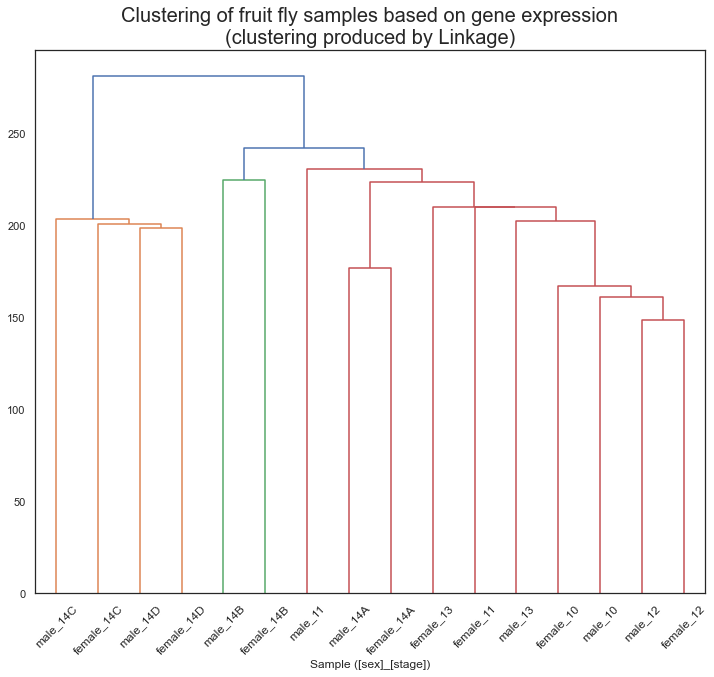

In [4]:
link = linkage(df_nums.T)
color_threshold = 0.85*max(link[:,2])

fig, ax = plt.subplots(figsize=(12,10))
dn = dendrogram(link, labels=df_nums.columns, color_threshold=color_threshold, ax=ax)
plt.xticks(rotation=45)
plt.title('Clustering of fruit fly samples based on gene expression\n(clustering produced by Linkage)',
          fontsize=20)
plt.xlabel('Sample ([sex]_[stage])')
plt.savefig('dendrogram_from_linkage.jpg', bbox_inches='tight')
plt.show()

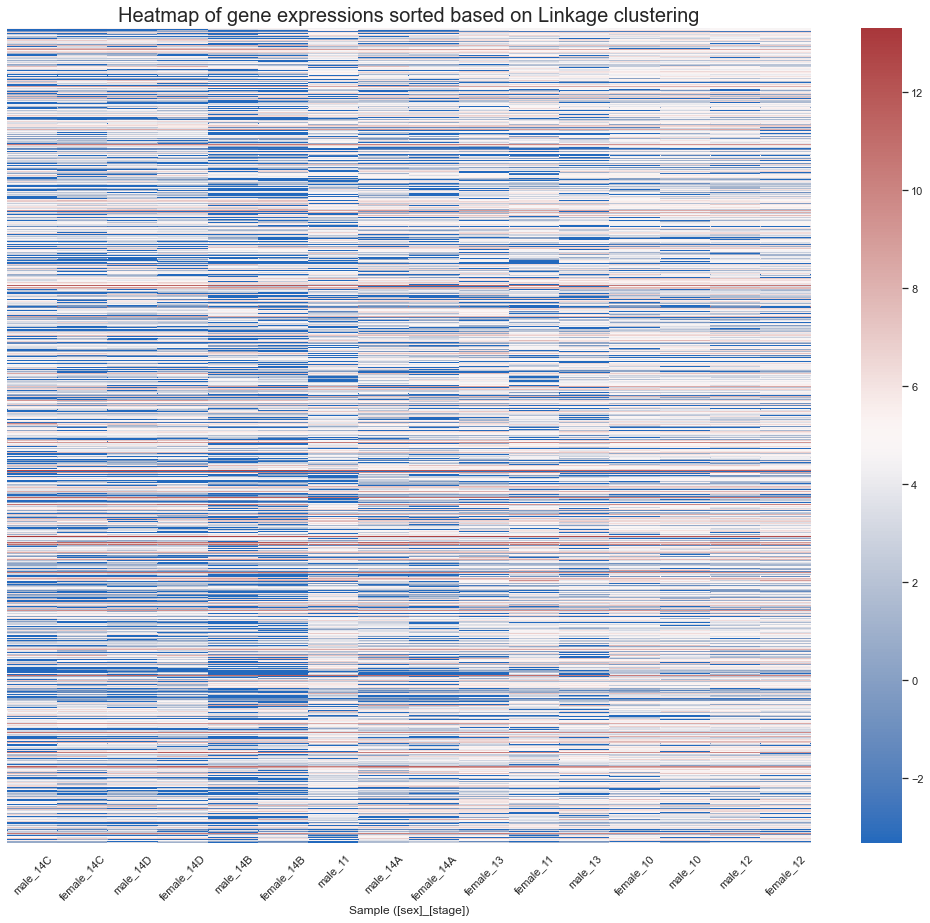

In [5]:
reordered_cols = []
for i in leaves_list(link):
    reordered_cols.append(df_nums.columns[i])

df_nums_reordered = df_nums[reordered_cols]
df_nums_reordered = df_nums_reordered.set_index(df['gene_name'])

fig, ax = plt.subplots(figsize=(18,15))
sns.heatmap(df_nums_reordered, cmap="vlag", yticklabels=False)
plt.xticks(rotation=45)
plt.title('Heatmap of gene expressions sorted based on Linkage clustering', fontsize=20)
plt.xlabel('Sample ([sex]_[stage])')
plt.ylabel('')
plt.savefig('heatmap_from_linkage.jpg', bbox_inches='tight')
plt.show()

# Clustermap with seaborn's clustermap function

/Users/cmdb/miniconda3/lib/python3.7/site-packages/seaborn/matrix.py:659: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


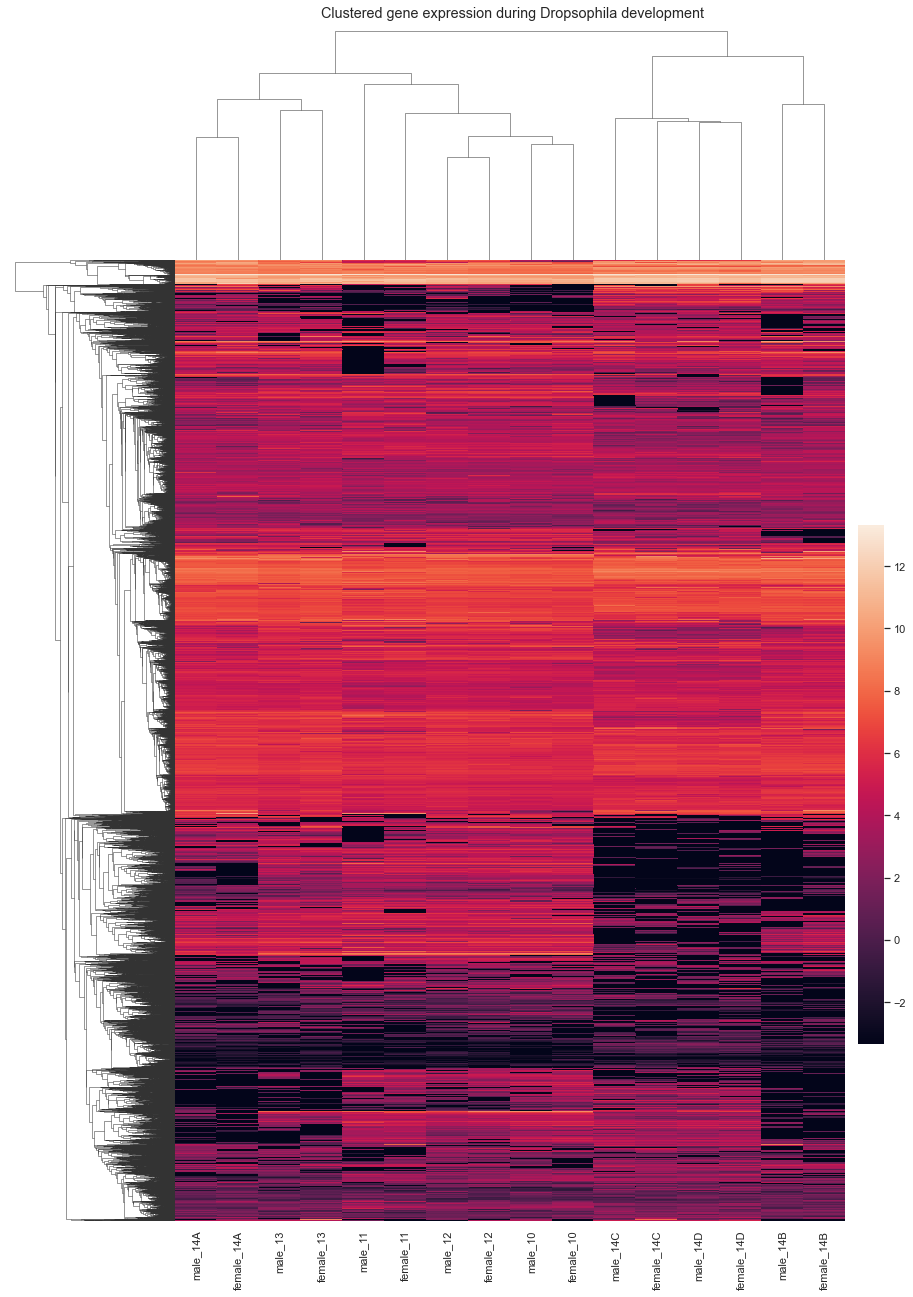

In [6]:
sns.clustermap(df_nums, figsize=(12,18), yticklabels=False, 
               cbar_pos=(1, .2, .03, .4), tree_kws={'linewidths': 0.5})
plt.suptitle('Clustered gene expression during Dropsophila development', x=0.6, y=1)
plt.savefig('clustermap_from_seaborn.jpg', bbox_inches='tight')
plt.show()

# Differential expression
______________________________________
# Ordinary least squares and QQ plot

In [7]:
df_T = df_nums.T
df_T['stage'] = [10, 11, 12, 13, 14, 14, 14, 14,
                 10, 11, 12, 13, 14, 14, 14, 14]
df_T['sex'] = ['male', 'male', 'male', 'male', 'male', 'male', 'male', 'male',
               'female', 'female', 'female', 'female', 'female', 'female', 'female', 'female']
df_T

,3,8,9,10,11,12,13,16,32,37,...,34649,34656,34658,34663,34665,34667,34684,34715,stage,sex
male_10,4.573651,3.472120,4.260622,2.681610,6.899972,2.705093,4.756461,3.146474,-3.321928,3.463929,...,-3.321928,2.776468,3.492078,5.063561,4.661599,11.191931,-2.534805,1.078063,10,male
male_11,3.593093,-3.321928,-3.321928,2.012708,3.552258,-3.321928,-3.321928,-3.321928,-3.321928,4.239056,...,-3.321928,-1.470133,-1.024012,0.209330,-0.437467,5.095088,-3.321928,-3.321928,11,male
male_12,4.383186,-3.321928,3.900371,2.665469,6.909741,3.387643,-3.321928,4.653752,-3.321928,4.670246,...,-3.321928,3.670053,2.117857,3.312209,4.418274,9.857502,-2.348207,3.016877,12,male
male_13,3.772605,-3.321928,4.801878,6.130167,6.245611,4.529754,4.852629,4.093288,-3.321928,4.083719,...,-3.321928,5.763758,6.549579,8.696872,9.014515,12.271701,-2.301821,1.113834,13,male
male_14A,4.240476,3.897757,4.484797,6.072718,6.188155,4.658374,4.892474,2.507524,3.465782,4.078810,...,5.247958,5.726288,6.448643,6.681296,8.350559,11.136488,-3.321928,1.696735,14,male
male_14B,4.749679,-3.321928,2.990301,2.945977,6.953605,4.435483,-3.321928,-3.321928,4.839966,-3.321928,...,-3.321928,2.676730,4.501407,4.675181,5.778312,9.213941,-3.321928,-3.321928,14,male
male_14C,4.518529,4.145813,3.801070,6.230339,6.345793,5.110117,4.421782,-3.321928,6.834119,3.484193,...,5.119850,5.723819,6.193772,6.166922,8.493319,11.283776,-3.321928,0.695194,14,male
male_14D,3.558602,3.436875,3.701063,5.750615,5.901059,4.143877,2.423376,3.733928,7.222319,-3.321928,...,4.603723,3.962273,5.823686,6.945737,7.797501,10.690080,-2.143405,3.215803,14,male
female_10,4.459054,-3.321928,4.222705,5.486961,5.602316,3.885497,4.157226,3.636828,-3.321928,4.533838,...,2.247168,3.427259,5.372933,6.905339,8.259794,11.332554,0.003268,3.762950,10,female
female_11,3.809626,-3.321928,1.594158,4.081859,4.196805,2.035947,-3.321928,-3.321928,-3.321928,3.095164,...,-3.321928,-0.163229,-1.374355,-0.371506,1.172241,6.260317,-3.321928,0.904145,11,female


In [14]:
X = df_T['stage']
X = sm.add_constant(X)
p_vals = []
slopes = []
index = []

for idx, col in df_T.iteritems():
    if idx == 'stage' or idx == 'sex':
        continue
    model = sm.OLS(col, X)
    results = model.fit()
    
    p_vals.append(results.pvalues[0])
    slopes.append(results.params[1])
    index.append(idx)

pre_df = {'p_vals': p_vals, 'slopes': slopes}
df_all_genes = pd.DataFrame(data=pre_df, index=index)
df_all_genes

,p_vals,slopes
3,0.001629,0.026464
8,0.189555,0.880440
9,0.722409,0.388746
10,0.512871,0.542177
11,0.118185,0.201195
...,...,...
34663,0.321664,0.820108
34665,0.341709,0.942403
34667,0.169844,0.231565
34684,0.976232,-0.212609


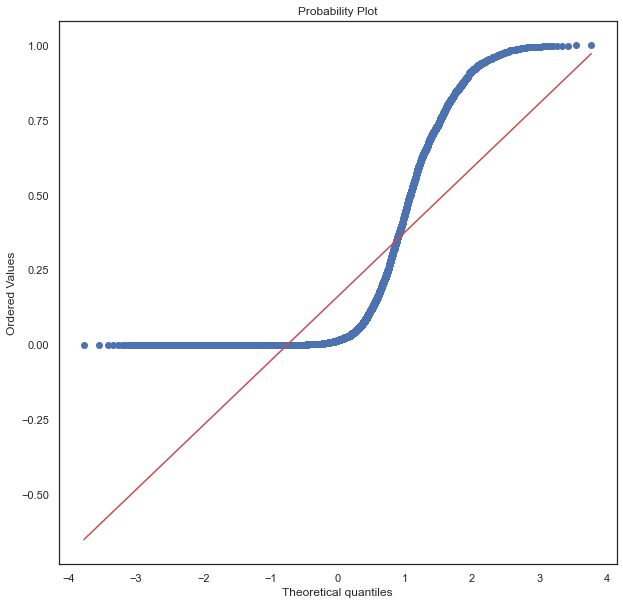

In [19]:
fig, ax = plt.subplots(figsize=(10,10))
stats.probplot(df_all_genes['p_vals'], dist="norm", plot=ax)
plt.show()

In [18]:
rej = multipletests(df_all_genes['p_vals'], alpha=0.1, method='fdr_bh')[0]
df_sig = df_all_genes[~rej]
   
set_sig = set()
f = open('genes_expressed_by_stage_no_covar.txt', 'w')
for idx in df_sig.index:
    set_sig.add(idx)
    gname = df.loc[idx, 'gene_name']
    tname = df.loc[idx, 't_name']
    
    f.write(gname + '\t' + tname + '\n')

f.close()
df_sig

,p_vals,slopes
8,0.189555,0.880440
9,0.722409,0.388746
10,0.512871,0.542177
11,0.118185,0.201195
12,0.153631,0.742588
...,...,...
34663,0.321664,0.820108
34665,0.341709,0.942403
34667,0.169844,0.231565
34684,0.976232,-0.212609


# OLS and QQ plot controlling for sex

In [28]:
X = df_T['stage']
X = sm.add_constant(X)
p_vals_wsex = []
slopes_wsex = []
index_wsex = []

for idx, col in df_T.iteritems():
    if idx == 'stage' or idx == 'sex':
        continue
    model = smf.ols(formula='col ~ X + sex', data=df_T)
    results = model.fit()
    
    p_vals_wsex.append(results.pvalues[0])
    slopes_wsex.append(results.params[1])
    index_wsex.append(idx)

pre_df_wsex = {'p_vals': p_vals_wsex, 'slopes': slopes_wsex}
df_all_genes_wsex = pd.DataFrame(data=pre_df_wsex, index=index_wsex)
df_all_genes_wsex

,p_vals,slopes
3,0.002520,-0.010210
8,0.224437,-0.903806
9,0.785365,-0.656229
10,0.624077,-1.291499
11,0.147551,0.399967
...,...,...
34663,0.361624,-0.440106
34665,0.392651,-0.844865
34667,0.198475,0.355380
34684,0.906547,-0.347088


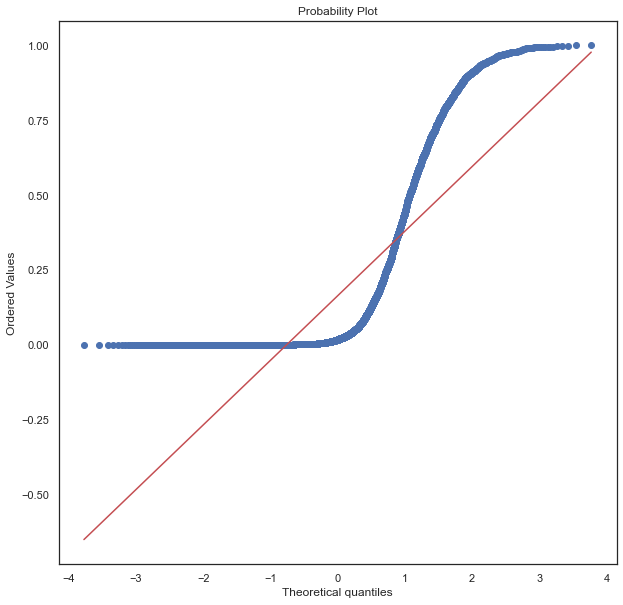

In [29]:
fig, ax = plt.subplots(figsize=(10,10))
stats.probplot(p_vals_wsex, dist="norm", plot=ax)
plt.show()

In [31]:
rej = multipletests(df_all_genes_wsex['p_vals'], alpha=0.1, method='fdr_bh')[0]
df_sig_wsex = df_all_genes_wsex[~rej]
   
set_sig_wsex = set()
f = open('genes_expressed_by_stage_with_covar.txt', 'w')
for idx in df_sig_wsex.index:
    set_sig_wsex.add(idx)
    gname = df.loc[idx, 'gene_name']
    tname = df.loc[idx, 't_name']
    
    f.write(gname + '\t' + tname + '\n')

f.close()
df_sig_wsex

,p_vals,slopes
8,0.224437,-0.903806
9,0.785365,-0.656229
10,0.624077,-1.291499
11,0.147551,0.399967
12,0.189605,-0.893386
...,...,...
34663,0.361624,-0.440106
34665,0.392651,-0.844865
34667,0.198475,0.355380
34684,0.906547,-0.347088


# Overlap of significant genes with and without covariate

In [32]:
f = open('gene_overlap.txt', 'w')
overlap = set_sig.intersection(set_sig_wsex)
percent_overlap = round(100*len(overlap)/len(set_sig), 3)

f.write('Percentage of significant genes that are also detected when controlling for sex:\n')
f.write(str(percent_overlap) + ' %\n')
f.close()

# Volcano plot (with covariate)

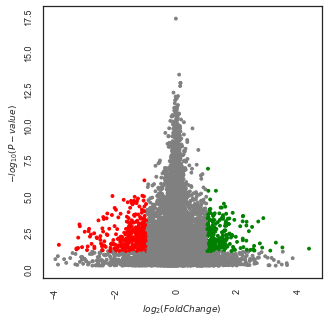

In [33]:
for_volcano = pd.DataFrame(list(zip(slopes_wsex, p_vals_wsex)),
                           columns =['slopes', 'p_values'])

visuz.gene_exp.volcano(df=for_volcano, lfc='slopes', pv='p_values',
                       show=True, pv_thr=(0.1, 0.1))